### STUDENT DETAILS

#### NAMES

- Laaria Chris  - laaria.chris@student.moringaschool.com

- Henry Rono    - henry.rono@student.moringaschool.com

- Beryl Agai    - beryl.agai@student.moringaschool.com


#### MODULE 

Full time

#### INSTRUCTORS

- Asha Deen

- Lucille Kaleha

#### JIRA BOARD

https://moringaprojectss.atlassian.net/jira/core/projects/PM/board?atlOrigin=eyJpIjoiNTM0MjRkYTYzNjJjNGUyNjg5MDA3NTAxZDJhY2NmOTciLCJwIjoiaiJ9



## PAEDIATRIC PNEUMONIA DETECTION THROUGH XRAY IMAGE CLASSIFICATION :A DEEP LEARNING APPROACH



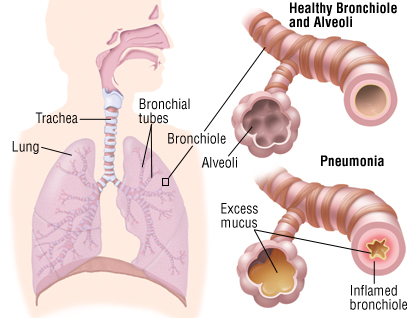

### 1. BUSINESS UNDERSTANDING

#### 1.1.1 Overview

From Mayo Clinic's Article on pneumonia

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.


#### 1.1.2 Stakeholders Definition

The possible stakeholders in this project are:

- Doctors and Radiologists: Receive support in diagnosing pneumonia more accurately and quickly.


- Patients: Benefit from faster diagnoses and timely treatment, leading to better health outcomes.


- Hospital and Clinic Administrators: Improve diagnostic efficiency and patient care while reducing operational costs.


- Healthcare Regulatory Authorities: Ensure the diagnostic tool adheres to medical standards, enhancing patient safety.


#### 1.1.3 Challenges Faced in paediatric peneumonia detection

Some of the challenges experienced in detecting paediatric pneumonia are:

- Variability in Symptoms: Pediatric pneumonia symptoms can vary widely, making it difficult to diagnose based solely on clinical presentation.


- Radiographic Differences: Children's chest x-rays can be harder to interpret due to differences in anatomy and the presence of other conditions.


- Limited Data: There is often a lack of large, labeled pediatric datasets for training and validating AI models.


- Co-morbidities: Children may have other respiratory illnesses that complicate the diagnosis of pneumonia.


- Ethical and Privacy Concerns: Ensuring the ethical use of children's medical data and maintaining strict privacy standards can be challenging.

#### 1.1.4 Proposed Solution and Sucess Criteria

- Customized CNN Architectures: Develop and train convolutional neural networks tailored for pediatric chest x-ray images, aiming for a ROC-AUC score of at least 0.90.


- Multi-task Learning: Implement models capable of diagnosing pneumonia and other respiratory conditions simultaneously, achieving a balanced accuracy of over 85% for all target conditions.


- Data Augmentation and Synthesis: Use data augmentation and synthetic data generation to create a diverse training dataset, improving the F1-score by 10% on the test set.

#### 1.1.5 Brief Conclusion

This project leverages advanced deep learning techniques to enhance the accuracy and efficiency of pediatric pneumonia detection from chest x-ray images. By addressing key challenges with customized CNN architectures, multi-task learning, and data augmentation, we aim to provide a reliable and scalable diagnostic tool for improved healthcare outcomes.








### 1.2 PROBLEM STATEMENT

In 2017, pneumonia was responsible for 15% of deaths in children under five years old, making it the most common cause of death in children.
We will develop a deep learning-based model to accurately classify whether a pediatric patient has pneumonia from chest x-ray images, addressing challenges such as variability in symptoms, radiographic differences, limited data, co-morbidities, and ethical concerns to improve diagnostic accuracy and efficiency in a clinical setting.


### 1.3 OBJECTIVES

#### 1.3.1 Main Objective

Our main objective is develop a deep learning-based model to accurately classify whether a pediatric patient has pneumonia from chest x-ray images,with at least 90% accuracy to improve diagnostic accuracy and efficiency in a clinical setting.


#### 1.3.2 Business Questions

The business questions that we need to ask so as to meet our main objective include:

- What is the anticipated impact on diagnostic efficiency and accuracy?
Evaluate how the model will improve the speed and precision of pneumonia diagnoses.


- What are the cost implications of implementing the model?
Assess the financial investment required versus potential cost savings from reduced misdiagnoses.


- How will the model integrate with existing healthcare systems?
Determine the technical and operational requirements for seamless integration into current IT infrastructure.


- What are the expected benefits for patients and healthcare providers?
Identify the improvements in patient outcomes and support provided to healthcare professionals.


#### 1.3.3 Success Metrics

- Diagnostic Accuracy: Achieve an accuracy of at least 90% in classifying pneumonia from chest x-ray images.


- ROC-AUC Score: Obtain a Receiver Operating Characteristic Area Under the Curve (ROC-AUC) score of 0.90 or higher, indicating strong performance in distinguishing between pneumonia and non-pneumonia cases.


- Reduction in Diagnostic Time: Decrease the average time for pneumonia diagnosis by at least 30% compared to current methods.


- Cost Savings: Realize a measurable reduction in costs associated with misdiagnoses and unnecessary treatments, aiming for a return on investment (ROI) of at least 20%.


- User Satisfaction: Achieve positive feedback from healthcare providers and patients, with a satisfaction rating of 85% or higher regarding the model’s usability and impact on care.








## B. DATA UNDERSTANDING

In [76]:
# Import libraries
import pandas as pd  # data processing
import numpy as np  # linear algebra
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
import os
import warnings
import random

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras import backend as K

# Image processing and visualizations
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2

# Ignore future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Setting Directories

In [77]:
#Defines directory paths for train, test, and validation datasets.
base_dir = Path("chest-xray-pneumonia/chest_xray/")
test_dir = base_dir / "test/"
train_dir = base_dir / "train/"
val_dir = base_dir / "val/"


The above code sets up directory paths for different dataset splits (train, test, validation) using Pathlib module.

### Data Loading

#### Files in test dataset

Set paths for normal and pneumonia images in the test dataset.

In [78]:
# Files in test dataset
os.listdir(test_dir)
test_normal_dir = test_dir / "NORMAL"
test_pneumonia_dir = test_dir / "PNEUMONIA"

In [79]:
test_normal_dir = test_dir /"NORMAL" #to set the path to the normals in test set
test_pneumonia_dir = test_dir /"PNEUMONIA" #to set the path to the pneumonias in test set

#### Files in train Dataset

In [80]:
os.listdir(train_dir)

['NORMAL', 'PNEUMONIA']

Set paths for normal and pneumonia images in the train dataset.

In [81]:
train_normal_dir = train_dir /"NORMAL" #to set the path to the normals in train set
train_pneumonia_dir = train_dir /"PNEUMONIA" #to set the path to the pneumonias in train set

#### Files in validatation Dataset

In [82]:
os.listdir(val_dir)

['NORMAL', 'PNEUMONIA']

Set paths for normal and pneumonia images in the validation dataset.

In [83]:
valid_normal_dir = val_dir /"NORMAL" #to set the path to the normals in validation set
valid_pneumonia_dir = val_dir /"PNEUMONIA" #to set the path to the pneumonias in validation set

### Labeling

#### Setting the dataset for training
Each image is paired with its corresponding label (0 for normal, 1 for pneumonia) using loops and lists.

In [84]:
train_normal= train_normal_dir.glob("*.jpeg") #to take the normal images from train set 
train_pneumonia=train_pneumonia_dir.glob("*.jpeg") #to take the pneumonia images from the train set
train_set=[]#to add all the train data into one list, we created a blank list

In [85]:
for img in train_normal: #to add every image of normals in trainset to the list
  train_set.append((img, 0)) #we add 0 with normal images as label
for img in train_pneumonia:#to add every image of pneumonias in trainset to the list
  train_set.append((img, 1)) #we add 1 with pneumonia images as label

In [86]:
print(train_set[:15]) #to check what our list look like

[(PosixPath('chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0575-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0127-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1091-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1039-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1038-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1150-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0207-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0555-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0430-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1028-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0531-0001-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/che

In [87]:
train_set=pd.DataFrame(train_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features


In [88]:
train_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

,image,label
0,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,0
1,chest-xray-pneumonia/chest_xray/train/NORMAL/I...,0
2,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,0
3,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,0
4,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,0


In [89]:
train_set=train_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
train_set=train_set.reset_index(drop=True) #to set the indexes as if first time
train_set.head()

,image,label
0,chest-xray-pneumonia/chest_xray/train/PNEUMONI...,1
1,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,0
2,chest-xray-pneumonia/chest_xray/train/PNEUMONI...,1
3,chest-xray-pneumonia/chest_xray/train/PNEUMONI...,1
4,chest-xray-pneumonia/chest_xray/train/PNEUMONI...,1


In [90]:
train_set=train_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
train_set=train_set.reset_index(drop=True) #to set the indexes as if first time
train_set.head()

,image,label
0,chest-xray-pneumonia/chest_xray/train/PNEUMONI...,1
1,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,0
2,chest-xray-pneumonia/chest_xray/train/PNEUMONI...,1
3,chest-xray-pneumonia/chest_xray/train/PNEUMONI...,1
4,chest-xray-pneumonia/chest_xray/train/PNEUMONI...,1


#### Setting the dataset for valdiation

In [91]:
valid_normal= valid_normal_dir.glob("*.jpeg") #to take the normal images from validation set 
valid_pneumonia=valid_pneumonia_dir.glob("*.jpeg") #to take the pneumonia images from the validation set
valid_set=[] #to add all the validation data into one list, we created a blank list

In [92]:
for img in valid_normal: #to add every image of normals in validationset to the list
  valid_set.append((img, 0)) #we add 0 with normal images as label
for img in valid_pneumonia:#to add every image of pneumonias in validationset to the list
  valid_set.append((img, 1)) #we add 1 with pneumonia images as label


In [93]:
print(valid_set[:15]) #to check what our list look like

[(PosixPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg'), 1), (PosixPath('chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg'), 1), (PosixPath('chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg'), 1), (PosixPath

In [94]:
valid_set=pd.DataFrame(valid_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features
valid_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

,image,label
0,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,0
1,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,0
2,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,0
3,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,0
4,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,0


In [95]:
valid_set=valid_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
valid_set=valid_set.reset_index(drop=True) #to set the indexes as if first time
valid_set.head()

,image,label
0,chest-xray-pneumonia/chest_xray/val/PNEUMONIA/...,1
1,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,0
2,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,0
3,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,0
4,chest-xray-pneumonia/chest_xray/val/PNEUMONIA/...,1


#### Setting the dataset for test

In [96]:
test_normal= test_normal_dir.glob("*.jpeg") #to take the normal images from test set 
test_pneumonia=test_pneumonia_dir.glob("*.jpeg") #to take the pneumonia images from the test set
test_set=[]#to add all the test data into one list, we created a blank list

In [97]:
for img in test_normal: #to add every image of normals in test set to the list
  test_set.append((img, 0)) #we add 0 with normal images as label
for img in test_pneumonia:#to add every image of pneumonias in test set to the list
  test_set.append((img, 1)) #we add 1 with pneumonia images as label


In [98]:
print(test_set[:15]) #to check what our list look like

[(PosixPath('chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0329-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0287-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0348-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0294-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0030-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0327-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0065-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0219-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0111-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0007-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0028-0001.jpeg'), 0), (PosixPath('chest-xray-pneumonia/chest_xray/

In [99]:
test_set=pd.DataFrame(test_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features
test_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

,image,label
0,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,0
1,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,0
2,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,0
3,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,0
4,chest-xray-pneumonia/chest_xray/test/NORMAL/IM...,0


In [100]:
test_set=test_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
test_set=test_set.reset_index(drop=True) #to set the indexes as if first time
test_set.head()

,image,label
0,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,0
1,chest-xray-pneumonia/chest_xray/test/PNEUMONIA...,1
2,chest-xray-pneumonia/chest_xray/test/PNEUMONIA...,1
3,chest-xray-pneumonia/chest_xray/test/PNEUMONIA...,1
4,chest-xray-pneumonia/chest_xray/test/PNEUMONIA...,1


### Data Visualization

Visualize sample images from the training set and displays distribution plots to show the imbalance between normal and pneumonia images.

In [101]:
# Normal Image
train_normal_count= train_set.loc[train_set["label"]==0]["image"].count()
print("Total number of normal images:", train_normal_count)

Total number of normal images: 1341


In [102]:
# Pneumonia Image
train_pneumonia_count= train_set.loc[train_set["label"]==1]["image"].count()
print("Total number of pneumonia images:", train_pneumonia_count)

Total number of pneumonia images: 3875


#### Normal / Pneumonia Image Visualization for Train Dataset

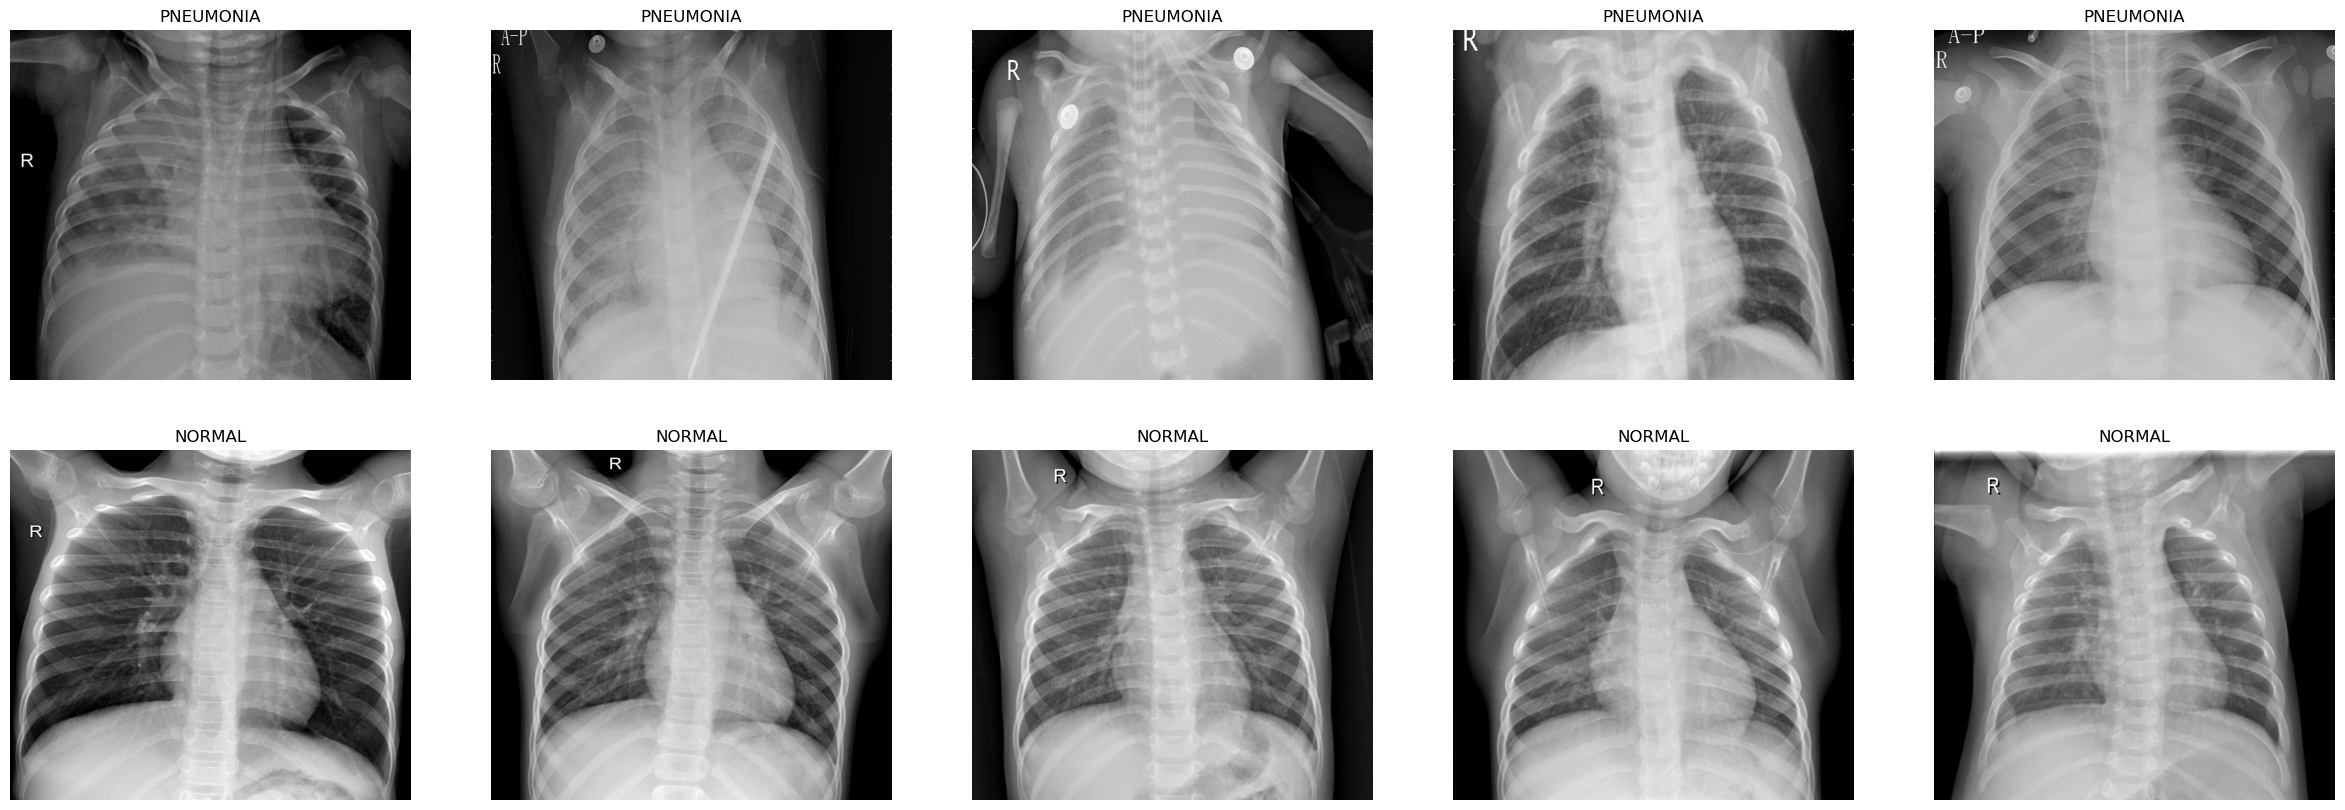

In [103]:
# Get few samples for both the classes
pneumonia_samples = (train_set[train_set["label"] == 1]["image"].iloc[:5]).tolist()
normal_samples = (train_set[train_set["label"] == 0]["image"].iloc[:5]).tolist()

# Concate the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data
f, ax = plt.subplots(2,5, figsize = (30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i % 5].imshow(img, cmap='gray')
    if i < 5:
        ax[i//5, i % 5].set_title("PNEUMONIA")
    else:
        ax[i//5, i % 5].set_title("NORMAL")
    ax[i//5, i % 5].axis('off')
    ax[i//5, i % 5].set_aspect('auto')
plt.show()

#### Distribution Plots

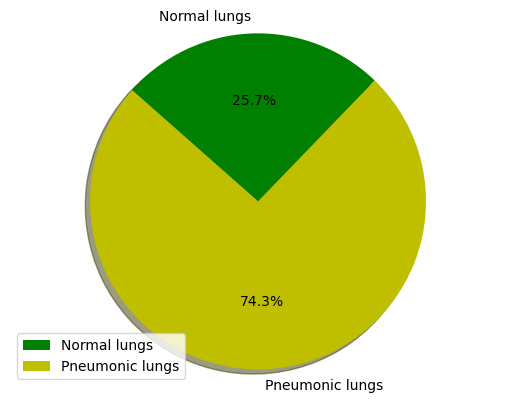

In [104]:
fig1,ax1= plt.subplots()
sizes=[train_normal_count, train_pneumonia_count]
ax1.pie(sizes, startangle=46 ,labels=["Normal lungs","Pneumonic lungs"], autopct="%1.1f%%", shadow=True, colors=["g","y"])
ax1.axis("equal")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Case Distribution')

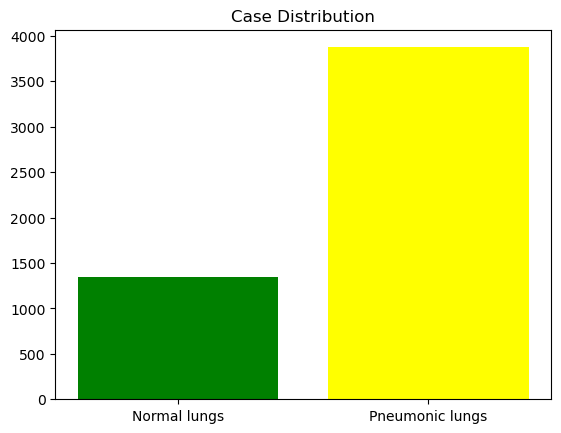

In [105]:
fig2, ax2=plt.subplots()
ax2.bar(height=sizes, x=["Normal lungs", "Pneumonic lungs"], color=["green", "yellow"])
plt.title("Case Distribution")

Based on this analysis, our dataset shows an imbalance between the number of "Normal" and "Pneumonia" images. To address this, we will employ Data Augmentation techniques specifically aimed at increasing the number of "Normal" images.





### Data Preparation

#### Data Distribution

The function (`get_training_data`) to load and preprocess images into arrays suitable for model training.

In [106]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

def get_training_data(data_dir):
    images = []
    class_nums = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is not None:
                    # Reshaping images to preferred size
                    resized_arr = cv2.resize(img_arr, (img_size, img_size))
                    images.append(resized_arr)
                    class_nums.append(class_num)
                else:
                    print(f"Failed to read image {os.path.join(path, img)}")
            except Exception as e:
                print(f"Error loading image {img}: {e}")
    
    return np.array(images), np.array(class_nums)

In [ ]:
# initialize multiple lists
X_train, X_val, X_test = [], [], []
y_train, y_val, y_test = [], [], []

# Populate lists with training data
for feature, label in zip(train_images, train_labels):
    X_train.append(feature)
    y_train.append(label)

# Populate lists with validation data
for feature, label in zip(val_images, val_labels):
    X_val.append(feature)
    y_val.append(label)

# Populate lists with test data
for feature, label in zip(test_images, test_labels):
    X_test.append(feature)
    y_test.append(label)

In [132]:

# Directories
train_images, train_labels = get_training_data(train_dir)
test_images, test_labels = get_training_data(test_dir)
val_images, val_labels = get_training_data(val_dir)




# Reshape image arrays to add a channel dimension
train_images = train_images.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)



val_images = val_images.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


test_images = test_images.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)


In [108]:
# Verify shapes
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(f"Validation images shape: {val_images.shape}")
print(f"Validation labels shape: {val_labels.shape}")

Train images shape: (5216, 150, 150, 1)
Train labels shape: (5216,)
Test images shape: (624, 150, 150, 1)
Test labels shape: (624,)
Validation images shape: (16, 150, 150, 1)
Validation labels shape: (16,)


We perform a grayscale normalization to reduce the effect of illumination's differences. Moreover the CNN converges faster on [0..1] data than on [0..255].

#### Data Normalization

In [110]:
X_train = np.array(X_train) /255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

#### Reshaping the data for deep learning model

## C. DATA AUGMENTATION

To avoid the overfitting problem, we need to artificially expand our dataset. We can further enlarge your existing dataset. The idea is to manipulate the training data with small transformations to reproduce the variations. Approaches that modify the training data to change the sequence representation while keeping the label the same are known as data augmentation techniques. Some popular magnifications people use are grayscales, horizontal flips, vertical flips, random crops, dithering, offsets, rotations, and much more. By applying just a few of these transformations to our training data, we can easily double or triple the number of training samples and create a very robust model. 

### Getting Train Generator

In [111]:
# normalize and augment images
image_generator = ImageDataGenerator(
  featurewise_center = False, # set input mean to 0 over the dataset
  samplewise_center = False, # set each sample mean to 0
  featurewise_std_normalization = False, #divide inputs by std of the dataset
  samplewise_std_normalization = False, # divide each input by its std
  zca_whitening=False,  # apply ZCA whitening
  rotation_range =30, #randomly rotate images in the range
  zoom_range = 0.2, #randomly zoom image
  width_shift_range = 0.1, #randomly shift images horizontally
  height_shift_range = 0.1, #randomly shift images vertically
  horizontal_flip = True, #randomly flip images
  vertical_flip = False) #randomly flip images
  
image_generator.fit(X_train)

For the data augmentation, we choosed to:

1. Randomly rotate some training images by 30 degrees
2. Randomly Zoom by 20% saome training images
3. Randomly shift imags horizontally by 10% of the width
4. Randomly shift images vertically by 10% of the height
5. Randomly flip images horizontally

## D. DATA MODELLING

### D.1 Building CNN Model

1. We construct  Convolutional Neural Network (CNN) model using Keras Sequential API. The model consists of convolutional layers, batch normalization, max pooling, dropout for regularization, and dense layers with sigmoid activation for binary classification.

2. Then compile the model with RMSprop optimizer and binary cross-entropy loss function. This trains the model using augmented data from ImageDataGenerator, specifying callbacks like learning rate reduction based on validation accuracy.

In [112]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())  # Add Flatten layer here
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/home/laaria/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 38, 38, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 38, 38, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 92416)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,829,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,885,889 (45.34 MB)

 Trainable params: 11,885,569 (45.34 MB)

 Non-trainable params: 320 (1.25 KB)

In [113]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1, 
                                            factor=0.3, 
                                            min_lr=0.000001)

In [114]:
history = model.fit(image_generator.flow(X_train, y_train, batch_size=32), 
                    epochs=10, 
                    validation_data=image_generator.flow(X_val, y_val),
                    callbacks=[learning_rate_reduction])

Epoch 1/10


/home/laaria/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 634s 4s/step - accuracy: 0.7779 - loss: 4.4860 - val_accuracy: 0.5000 - val_loss: 14.3995 - learning_rate: 0.0010
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.8656 - loss: 0.3834 - val_accuracy: 0.5000 - val_loss: 59.1586 - learning_rate: 0.0010
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8938 - loss: 0.2813
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.8938 - loss: 0.2812 - val_accuracy: 0.5000 - val_loss: 39.7139 - learning_rate: 0.0010
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9125 - loss: 0.2138 - val_accuracy: 0.5000 - val_loss: 4.1468 - learning_rate: 3.0000e-04
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9310 - loss: 0.1917
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
163/163 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.9310 - loss: 0.1917 - val

In [119]:
X_test = np.array(X_test)
y_test = np.array(y_test)


In [120]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.8826 - loss: 0.2626
Loss of the model is -  0.2890170216560364
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.8826 - loss: 0.2626
Accuracy of the model is -  86.69871687889099 %


In [118]:
print(type(X_test), type(y_test))

<class 'numpy.ndarray'> <class 'list'>


## E.EVALUATION

**1. Model Evaluation**

We evaluate the trained model on the test dataset to compute loss and accuracy metrics and plot training and validation accuracy/loss curves over epochs to visualize model performance and potential overfitting.

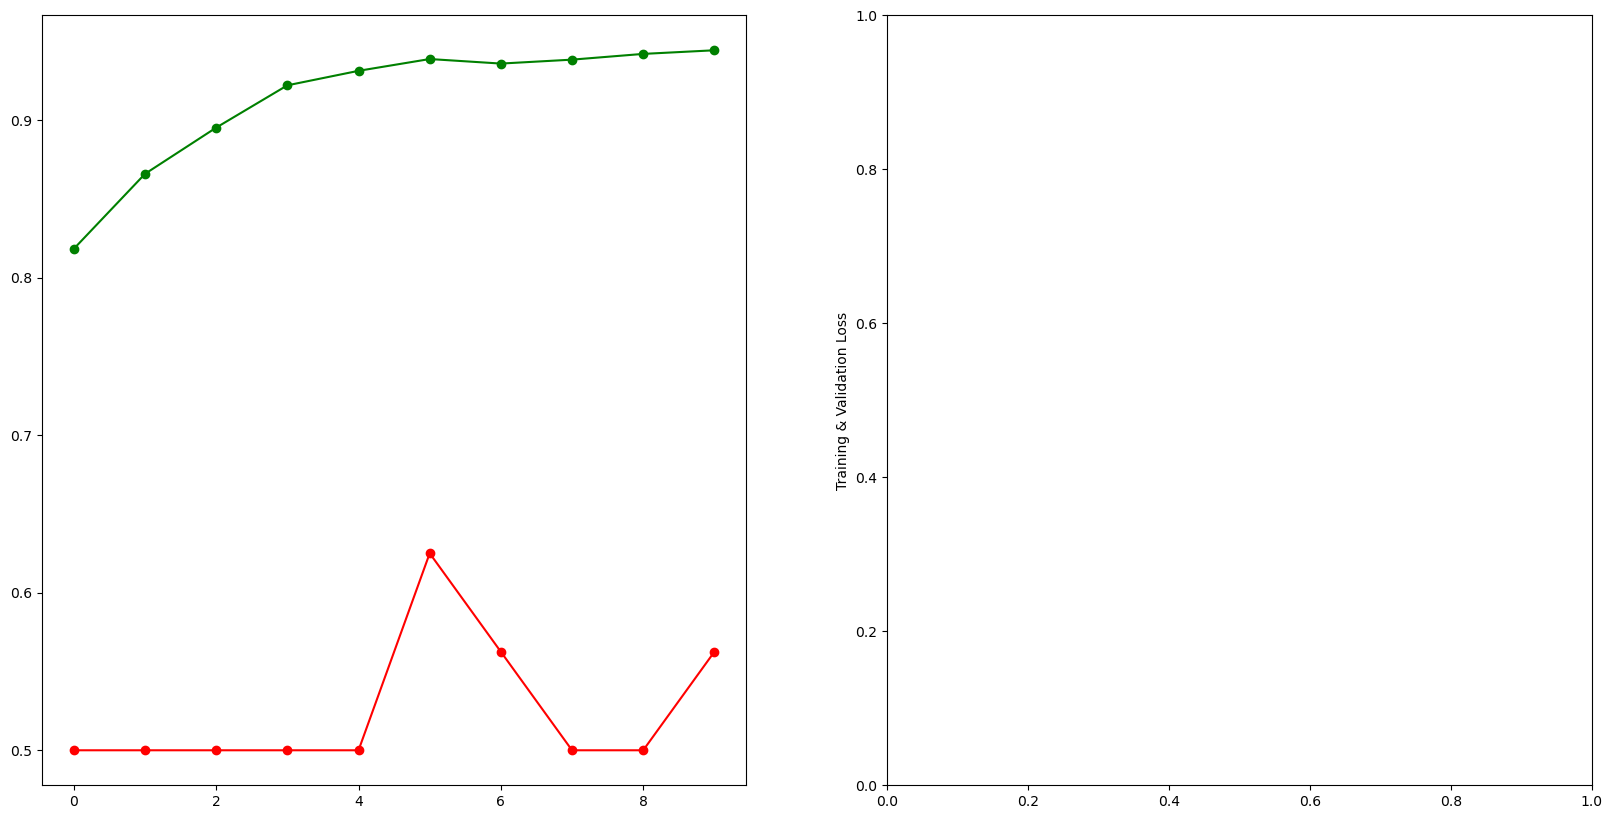

In [121]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [122]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions = predictions.reshape(1, -1)[0]
predictions[:15]


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 286ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int32)

**2. Confusion Matrix and Classification Report**

For this we generate a confusion matrix and classification report to assess the model's performance on the test dataset and visualizes the confusion matrix using seaborn heatmap for better understanding of true positive, false positive, true negative, and false negative predictions.

In [123]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.90      0.88      0.89       390
   Normal (Class 1)       0.81      0.84      0.83       234

           accuracy                           0.87       624
          macro avg       0.86      0.86      0.86       624
       weighted avg       0.87      0.87      0.87       624



In [127]:
cm = confusion_matrix(y_test, predictions)
cm

array([[344,  46],
       [ 37, 197]])

In [128]:
cm = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])


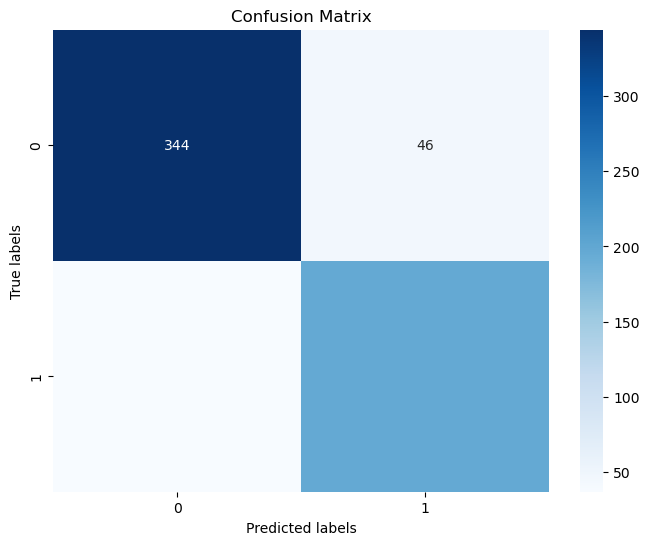

In [130]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add axis labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

In [131]:
#Indexes correct and incorrect predictions from the test dataset to further analyze model performance.
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]